# Creating phase diagram using trained model

In [1]:
import torch
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras
# import tensorflow as tf
import torch

from pathlib import Path

import matplotlib.pyplot as plt


/home/rothals/dev/school/diploma_thesis/dev/venv/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Old (non-relevant) toy model <- need to be replaced

# This does no longer work (I would have to save the model like this: 
#   model.save("saved_models/model_original.keras", save_format="keras"))
model = keras.models.load_model("saved_models/skyrmion-2025-02-07_145609-a=relu,a=None,b=16,b=1e-05,c=standard,d=0,d=None,d=3,d=0.1,e=1,f=8,g=False,k=0.0001,k=3,l=0.0,l=0.1,l=0.001,l=None,m=model5,o=SGD,p=same,p=max,s=True,s=42,s=0.0,s=1,t=1,w=0.keras", compile=False)

# model = keras.layers.TFSMLayer("saved_models/model_original", call_endpoint="serving_default")

In [3]:
dataset = np.load("data/train/datasetMC.npz")

In [4]:

data_tensor = torch.Tensor(dataset["data"])

predictions = model.predict(data_tensor)

prediction_dataset = {
    "data": predictions,
    "values": dataset["values"]
}

  9/308 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step  

/home/rothals/dev/school/diploma_thesis/dev/venv/lib64/python3.10/site-packages/keras/src/backend/torch/nn.py:439: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  outputs = tnn.conv2d(


308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


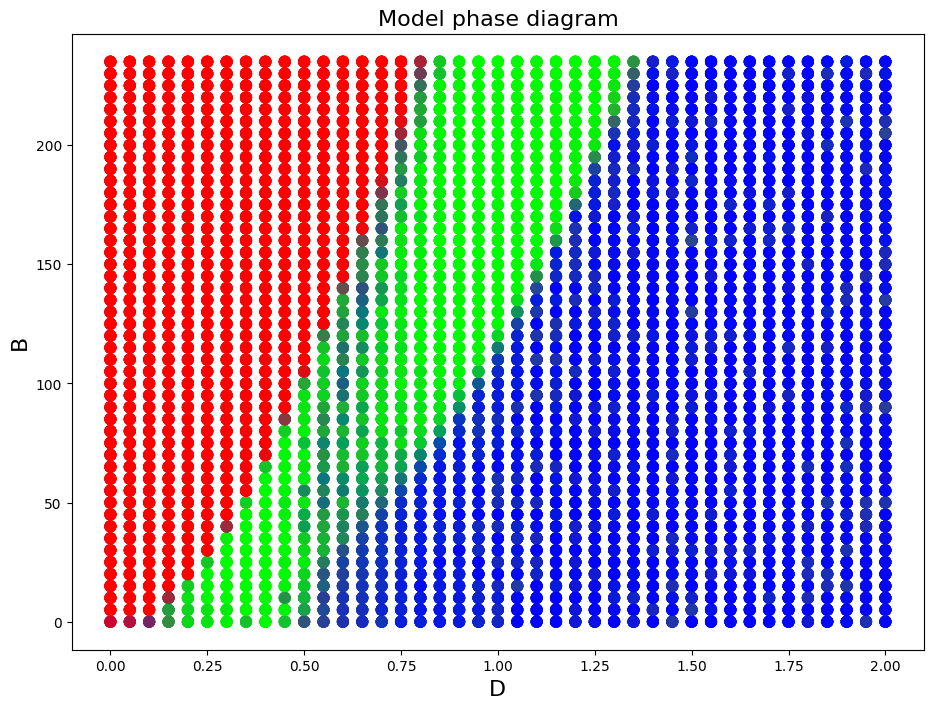

In [16]:
fig, ax = plt.subplots(figsize=(11,8))

r = prediction_dataset["data"][:, 0]
b = prediction_dataset["data"][:, 1]
g = prediction_dataset["data"][:, 2]

colors = np.stack([r, b, g], axis=1)

ax.scatter(*prediction_dataset["values"].T, c=(colors), marker="o", s=60)

ax.set_title("Model phase diagram", size=16)
ax.set_xlabel("D", size=16)
ax.set_ylabel("B", size=16)

plt.show()